## Dataset Preparation
- split
- directory

### Declare the directory

In [1]:
trainpath= 'splited-datasets/train'
validpath='splited-datasets/val'
testpath='splited-datasets/test'

### Set the Image Size

In [2]:
img_width, img_height = (128, 128)

In [3]:
epochs = 10
batch_size = 32

## Import Required Modules

`pip install tensorflow matplotlib pandas seaborn`


In [4]:

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing and Augumentation    
Examples:   
- To balance the dataset and to increase the size of training and testing dataset
- Regularization technique to minimize overfitting
- Rescaling the image is Normalizing the image

In this notebook, I will not used any techniques for augmenting images since my datasets already augmented to avoid overfitting. The datasets was collected from different repositories, and already increase its size using data augmentation.

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    trainpath,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_width, img_height),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 240 files belonging to 3 classes.


In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    validpath,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_width, img_height),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 30 files belonging to 3 classes.


## Transfer Learning
### Select Model

In [7]:
cnn = tf.keras.models.Sequential()

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[img_width, img_height,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

#Output Layer
cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

d:\2024-2025 SEM 1\Event-Driven Programming\Modules\Part 9 - Machine Learning (ML) Development\Unsupervised Learning\Crop Disease Classification\mlenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

## Training Process

In [11]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=epochs)

Epoch 1/10


8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.3920 - loss: 1.4917 - val_accuracy: 0.4000 - val_loss: 0.9942
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.5778 - loss: 0.9665 - val_accuracy: 0.8333 - val_loss: 0.7078
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7790 - loss: 0.6116 - val_accuracy: 0.9000 - val_loss: 0.4905
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8827 - loss: 0.3589 - val_accuracy: 0.9000 - val_loss: 0.2590
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9111 - loss: 0.2348 - val_accuracy: 0.9000 - val_loss: 0.2202
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9372 - loss: 0.2024 - val_accuracy: 0.9667 - val_loss: 0.3221
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9597 - loss: 0.1299 - val_accuracy: 0.9667 - val_loss: 0.1402
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9775 - loss: 0.0999 - val_accuracy: 0.9333 - val_loss: 0.1167
Epoch 9/10
8/8 ━━━━

## Training Accuracy

In [12]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 545ms/step - accuracy: 0.9901 - loss: 0.0267
Training accuracy: 0.9958333373069763


## Validation Accuracy

In [13]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step - accuracy: 1.0000 - loss: 0.0241
Validation accuracy: 1.0


## Save the Model in Keras format

In [14]:
cnn.save('modelkeras/trained_corn_disease_model.keras')

In [15]:
#Recording History in json
import json
with open('modelkeras/training_corn_hist.json','w') as f:
  json.dump(training_history.history,f)

## Save the Model in h5 format

In [16]:
cnn.save('modelh5/trained_corn_disease_model.h5')

In [17]:
#Recording History in json
import json
with open('modelh5/training_corn_hist.json','w') as f:
  json.dump(training_history.history,f)

## Model History

In [18]:
training_history.history #Return Dictionary of history

{'accuracy': [0.40416666865348816,
  0.612500011920929,
  0.7833333611488342,
  0.887499988079071,
  0.875,
  0.9541666507720947,
  0.9541666507720947,
  0.9708333611488342,
  0.9791666865348816,
  0.9958333373069763],
 'loss': [1.382871389389038,
  0.9275205135345459,
  0.5658595561981201,
  0.3664277493953705,
  0.29609811305999756,
  0.16902926564216614,
  0.15342853963375092,
  0.10258688032627106,
  0.06774266809225082,
  0.03576700761914253],
 'val_accuracy': [0.4000000059604645,
  0.8333333134651184,
  0.8999999761581421,
  0.8999999761581421,
  0.8999999761581421,
  0.9666666388511658,
  0.9666666388511658,
  0.9333333373069763,
  0.9666666388511658,
  1.0],
 'val_loss': [0.9941864609718323,
  0.7078273892402649,
  0.49051982164382935,
  0.2590338885784149,
  0.2202281355857849,
  0.3220767676830292,
  0.14019393920898438,
  0.11665020138025284,
  0.07552848756313324,
  0.024110261350870132]}

In [19]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [20]:
training_accuracy      = training_history.history['accuracy'][-1]
training_loss          = training_history.history['loss'][-1]
validation_accuracy    = training_history.history['val_accuracy'][-1]
validation_loss       = training_history.history['val_loss'][-1]
print("Training Accuracy   :", training_accuracy )
print("Training Loss       :", training_loss)
print("Validation Accuracy :", validation_accuracy)
print("Validation Loss     :", validation_loss)

Training Accuracy   : 0.9958333373069763
Training Loss       : 0.03576700761914253
Validation Accuracy : 1.0
Validation Loss     : 0.024110261350870132


## Visualization

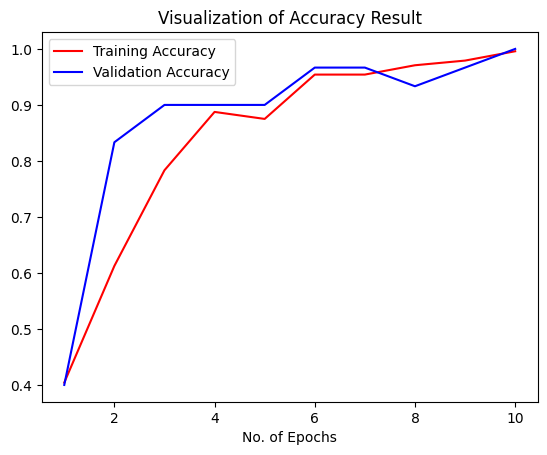

In [21]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [22]:
class_name = validation_set.class_names

In [23]:
class_name

['blight', 'common_rust', 'faw']

## Test

In [24]:
test_set = tf.keras.utils.image_dataset_from_directory(
    testpath,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_width, img_height),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 30 files belonging to 3 classes.


In [25]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [26]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [27]:
Y_true

<tf.Tensor: shape=(30,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])>

In [28]:
predicted_categories

<tf.Tensor: shape=(30,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2])>

## Model Evaluation

In [29]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [30]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

      blight       0.83      1.00      0.91        10
 common_rust       1.00      1.00      1.00        10
         faw       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



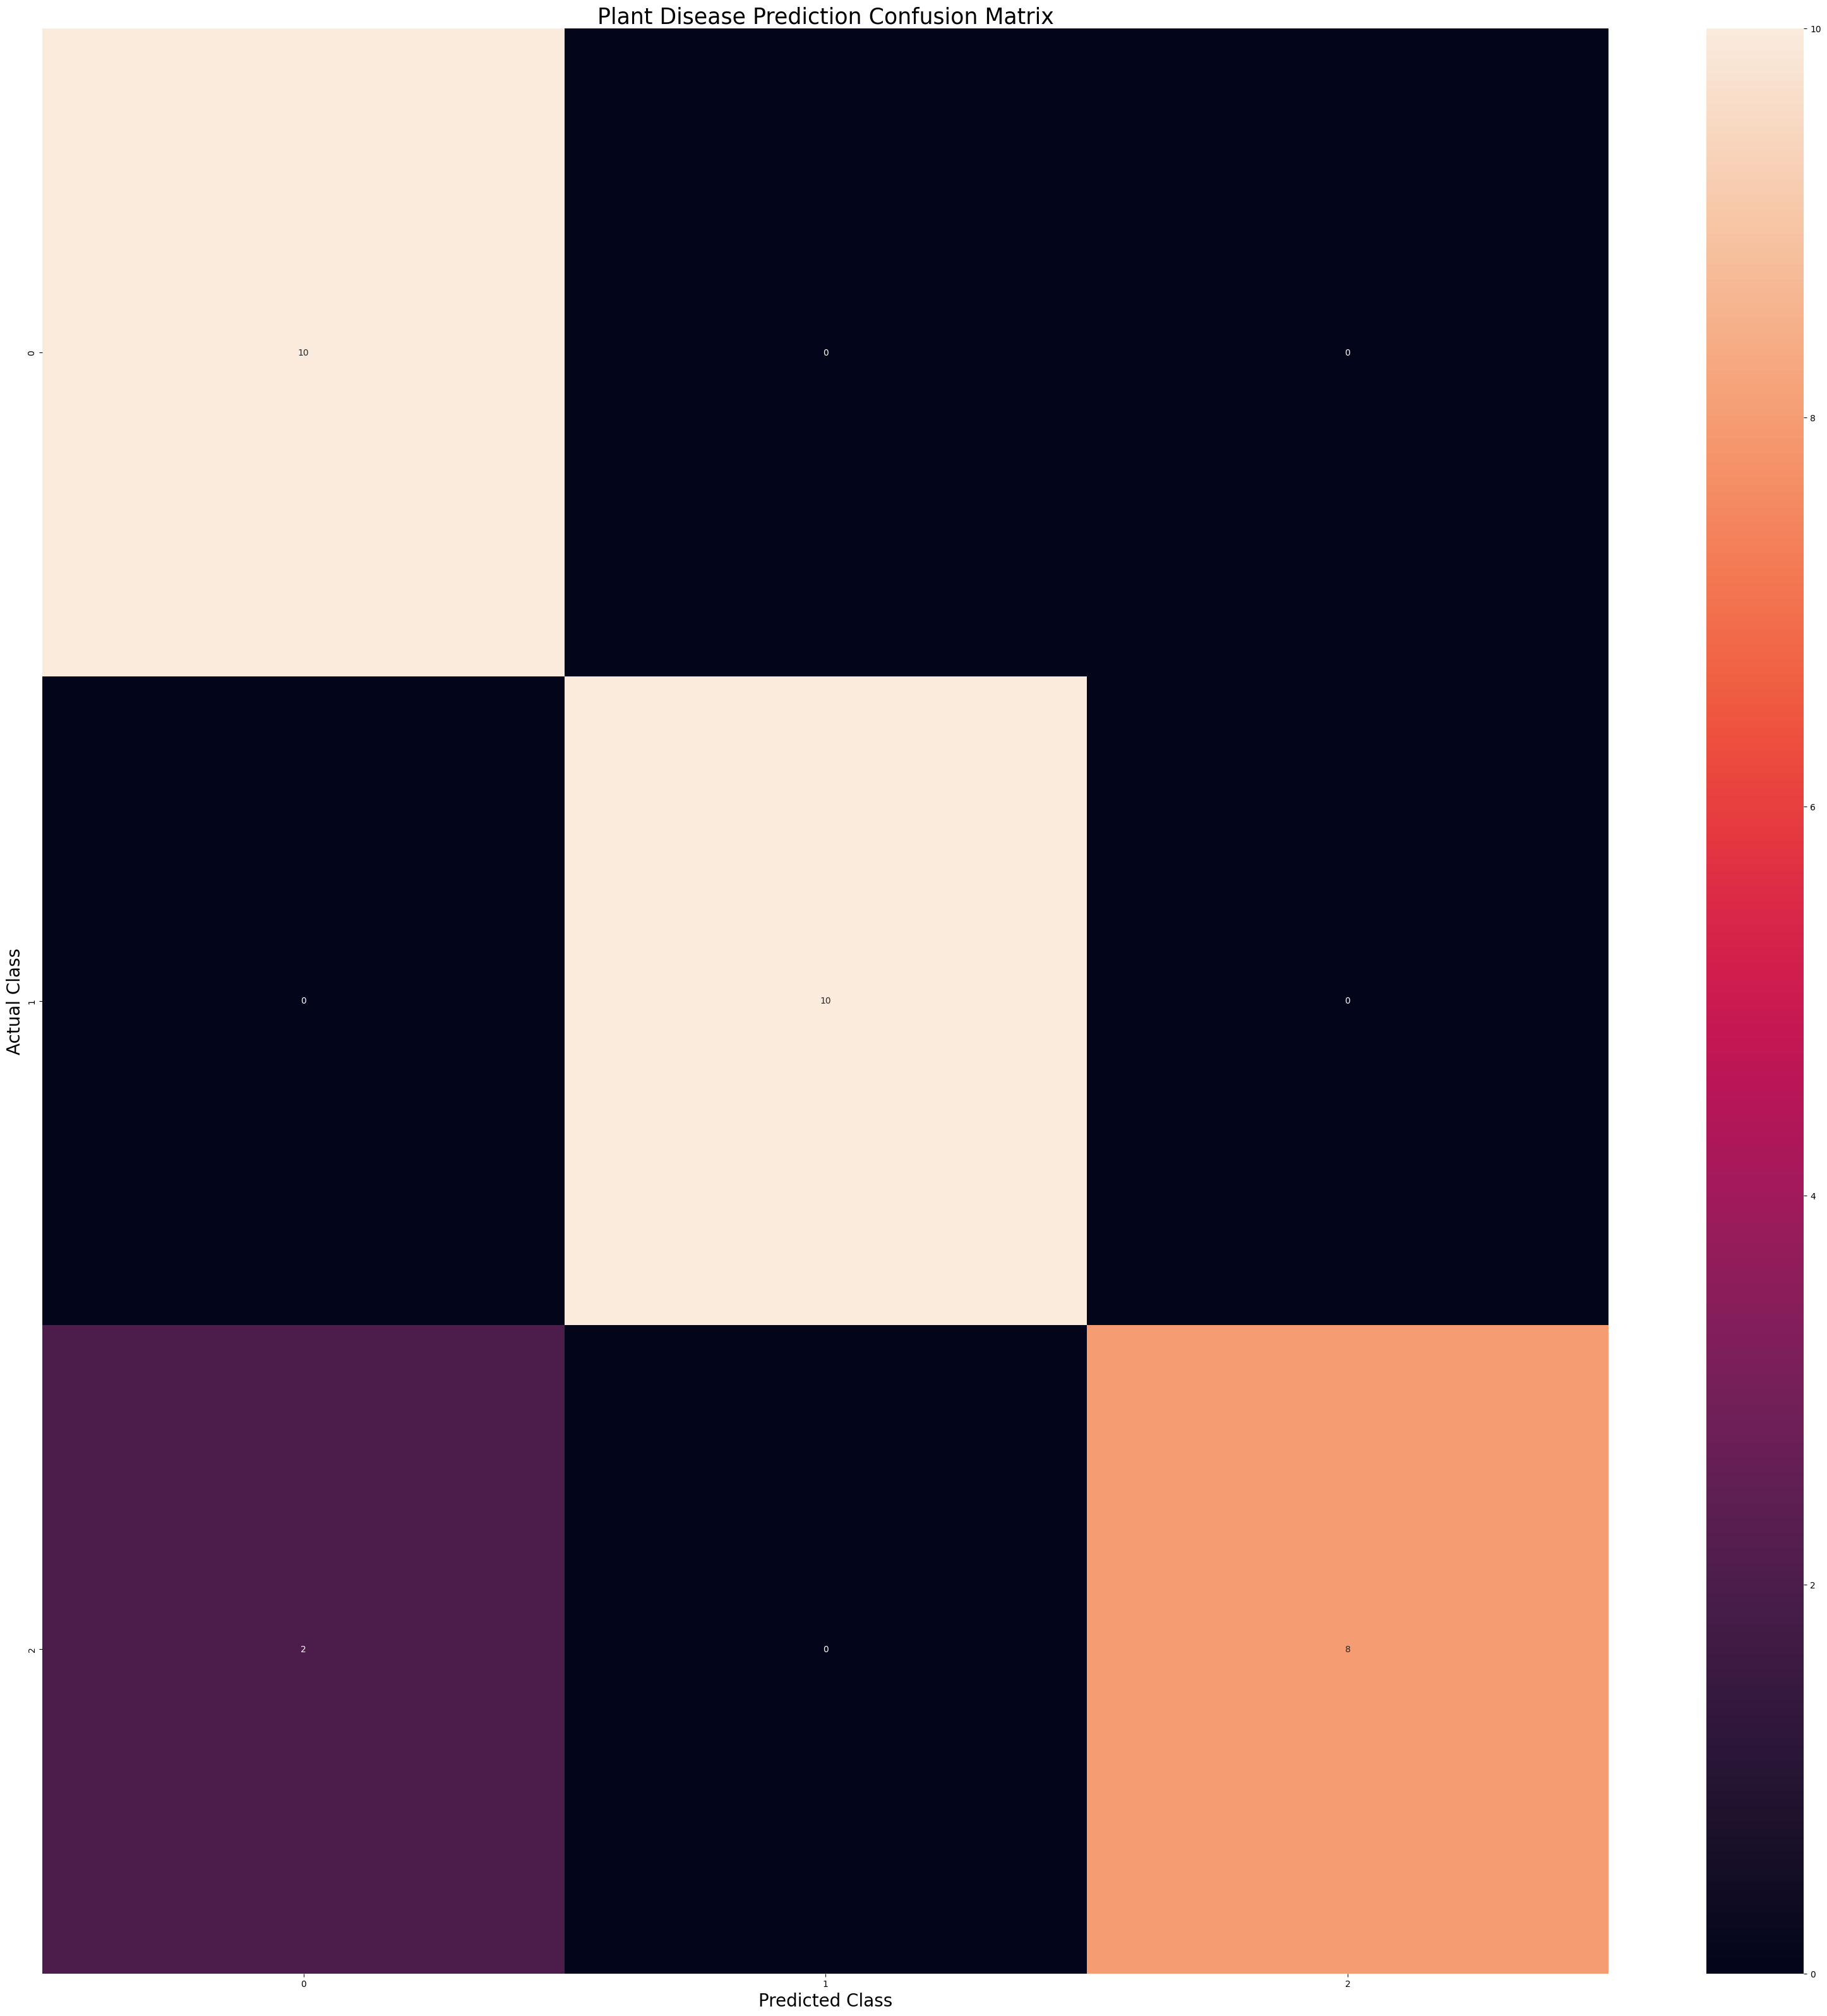

In [31]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

# Deploy the Model

load model

In [32]:
cnn_corn = tf.keras.models.load_model('modelkeras/trained_corn_disease_model.keras')

load image

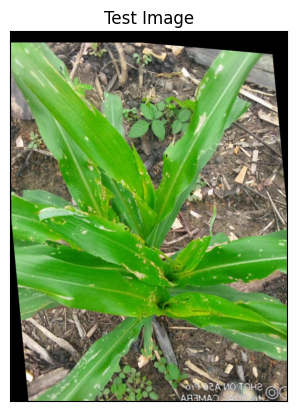

In [33]:
#Test Image Visualization
import cv2
image_path = 'sample.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

preprocess image

In [34]:
#image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
#input_arr = tf.keras.preprocessing.image.img_to_array(image)

import numpy as np
from PIL import Image
from numpy import asarray

# Load the image
img = Image.open(image_path)

# Resize the image
resized_img = img.resize((128, 128))

# Convert to a NumPy array
numpydata = asarray(resized_img)

input_arr = np.array([numpydata])  # Convert single image to a batch.


Predict

In [35]:
predictions = cnn_corn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


In [36]:
print(predictions)

[[2.9923786e-09 3.9040572e-12 1.0000000e+00]]


In [37]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


In [40]:
print(class_name)

['blight', 'common_rust', 'faw']


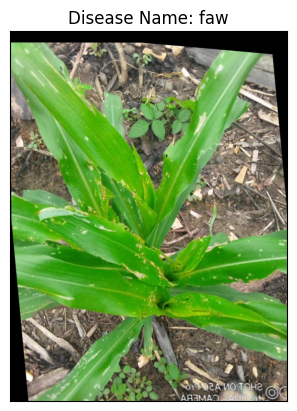

In [41]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

## Other way to save the model

In [ ]:
# Save model architecture to JSON file
model_json = cnn_corn.to_json()
with open("modeljs/model_architecture.json", "w") as json_file:
    json_file.write(model_json)


In [ ]:
# Save model weights to HDF5 file
cnn_corn.save_weights("modeljs/model_weights.weights.h5")


In [49]:
# Load model architecture from JSON file
with open('modeljs/model_architecture.json', 'r') as json_file:
    loaded_model_json = json_file.read()

# Reconstruct model from JSON string
loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# Load weights into the model
loaded_model.load_weights("modeljs/model_weights.weights.h5")
